In [39]:
from src.modules.data_clean import (
    clean_dataset,
    ica_plot,
    iclabel_visual,
    read_data,
    visualise_raw_data,
)
from src.modules.feature_ext import (
    combine_data,
    compute_psd,
    plot_grouped_topomaps,
    save_band_power_to_csv,
)
from src.modules.random_forest import (
    classify_new_data,
    train_model,
)

first, we read the .set file format using the mne "read_raw_eeglab" function, then we visualised the 
raw eeg data using a basic plot function and band pass filtering the data from 0.5 to 45 Hz, the relevant 
brain activity according to the litureture 

In [40]:
file_path = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/raw/a001.set"
raw_eeg = read_data(file_path)

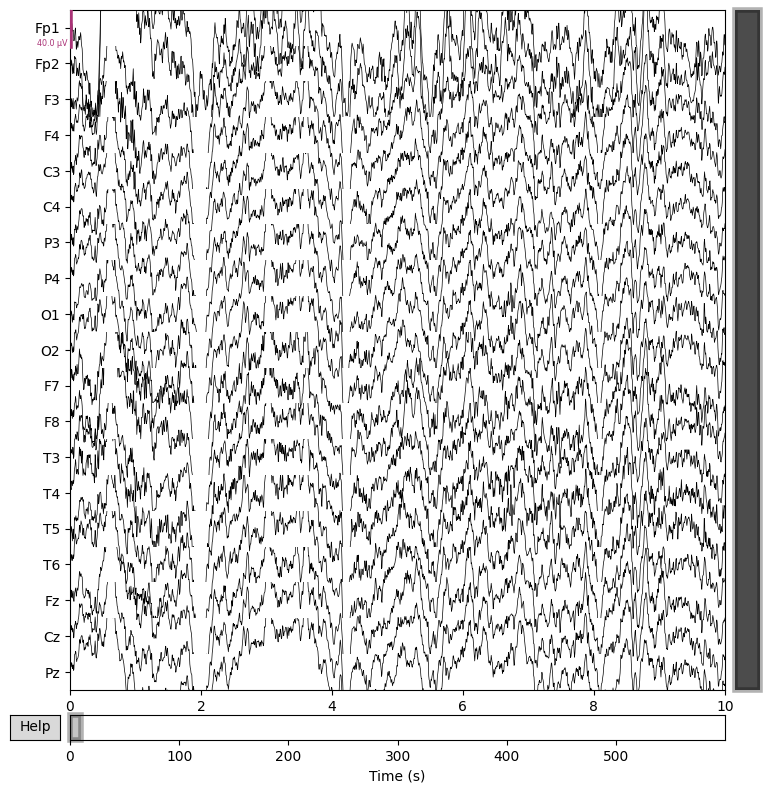

In [41]:
visualise_raw_data(raw_eeg)

Now, we want to automaticly ICA filter the face muscle and eye movement noise. first, we must visualise  the topography of the ica to get a better feel of what we are going to filter

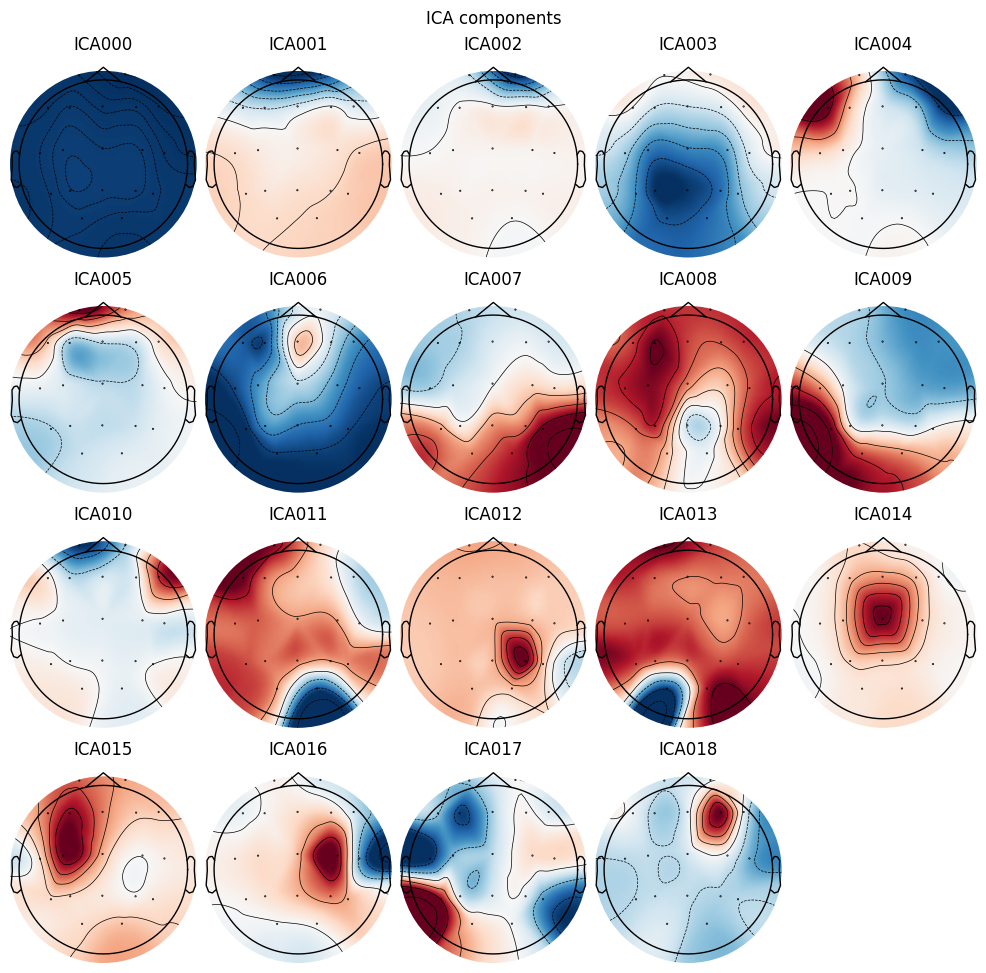

In [42]:
ica_plot(raw_eeg)

We used the macine learning model called "ICAlabel" to automaticly label noisey components and filter them

/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:76: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  labels = label_components(data, ica, method="iclabel")
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:76: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  labels = label_components(data, ica, method="iclabel")
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/data_clean.py:76: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was design

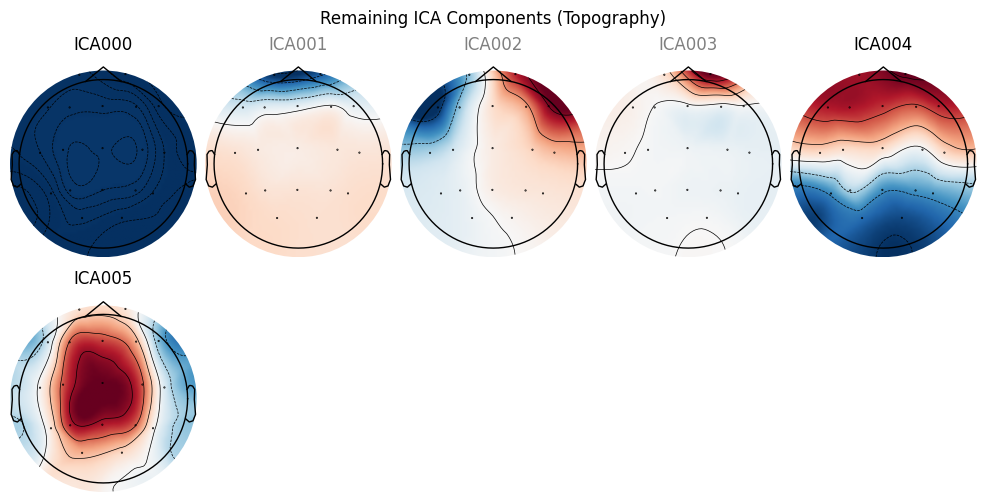

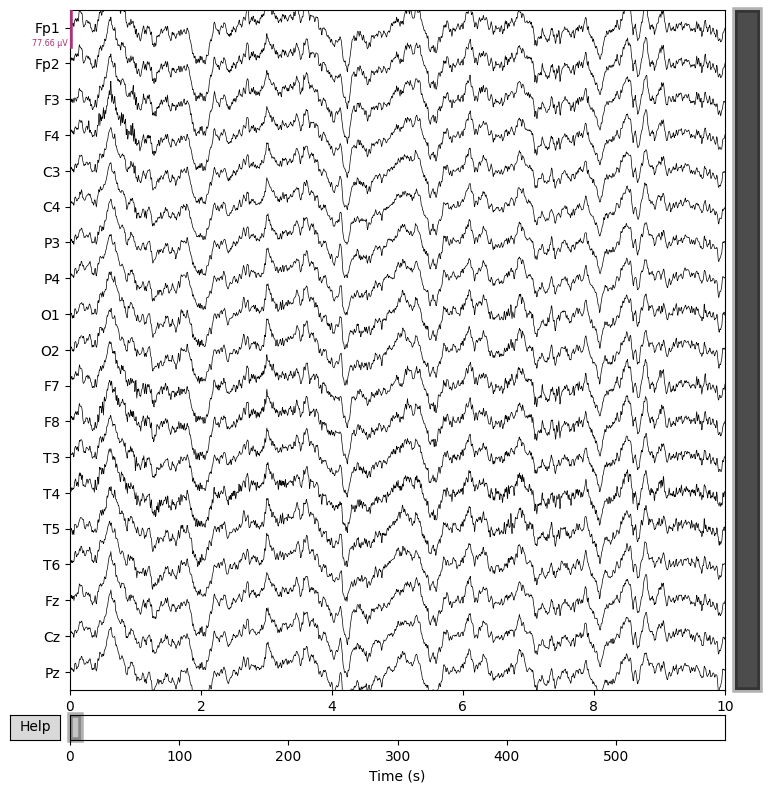

<RawEEGLAB | a001.set, 19 x 299900 (599.8 s), ~43.5 MiB, data loaded>

In [43]:
iclabel_visual(raw_eeg)

Now we run the same automatic ica filtering through the entire database 

In [44]:

# Process all .set files in the specified directory
i = 0
files_num = 3
while i <= files_num:
    if i == 0:
        file_path = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/data/alzhimer/raw"
        clean_dataset(file_path)
    elif i == 1:
        file_path = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/data/control/raw"
        clean_dataset(file_path)
    else:
        file_path = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/data/frontotemporal/raw"
        clean_dataset(file_path)
    i += 1


Now we can combine our data to create a united power spectral density plot to visualise the diffrences between each group 

In [45]:
combined_alz = combine_data("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/clean")
combined_con = combine_data("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/clean")
combined_ft = combine_data("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/clean")

/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/feature_ext.py:34: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw: mne.io.BaseRaw = mne.io.read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/feature_ext.py:34: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw: mne.io.BaseRaw = mne.io.read_raw_eeglab(file_path, preload=True)
/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/feature_ext.py:34: RuntimeWarning: Estimated head radius (11.6 cm) is above the 99th percentile for adult head size. Check if the montage_units argument is corre

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/noam/Documents/myProjects/Resting-state-EEG-project/venv/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


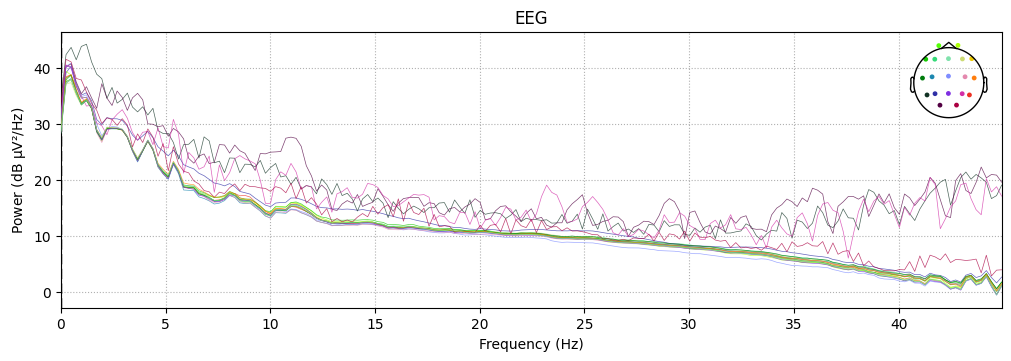

In [46]:
compute_psd(combined_alz) #Alzhimer

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/noam/Documents/myProjects/Resting-state-EEG-project/venv/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


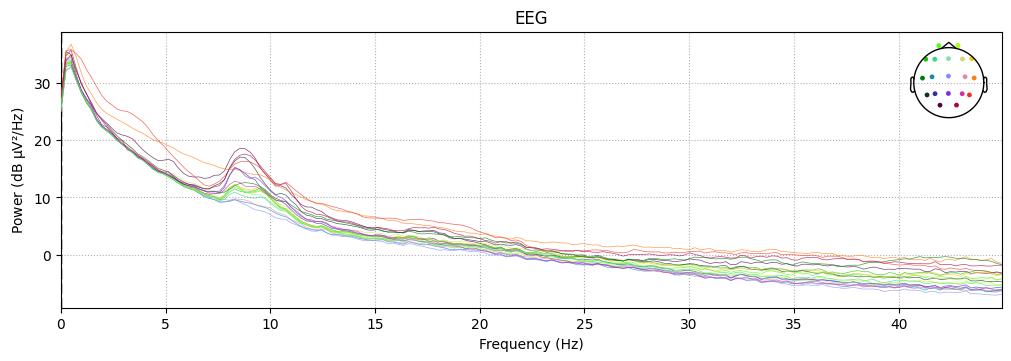

In [47]:
compute_psd(combined_con) #Control

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/Users/noam/Documents/myProjects/Resting-state-EEG-project/venv/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


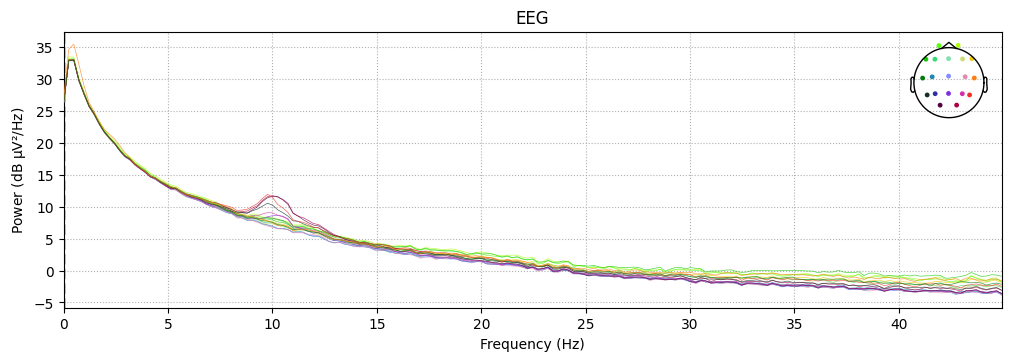

In [48]:
compute_psd(combined_ft) # Fronto-temporal dementia

we divide the combined data to specific band to better visualise the diffrences 

/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/modules/feature_ext.py:158: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


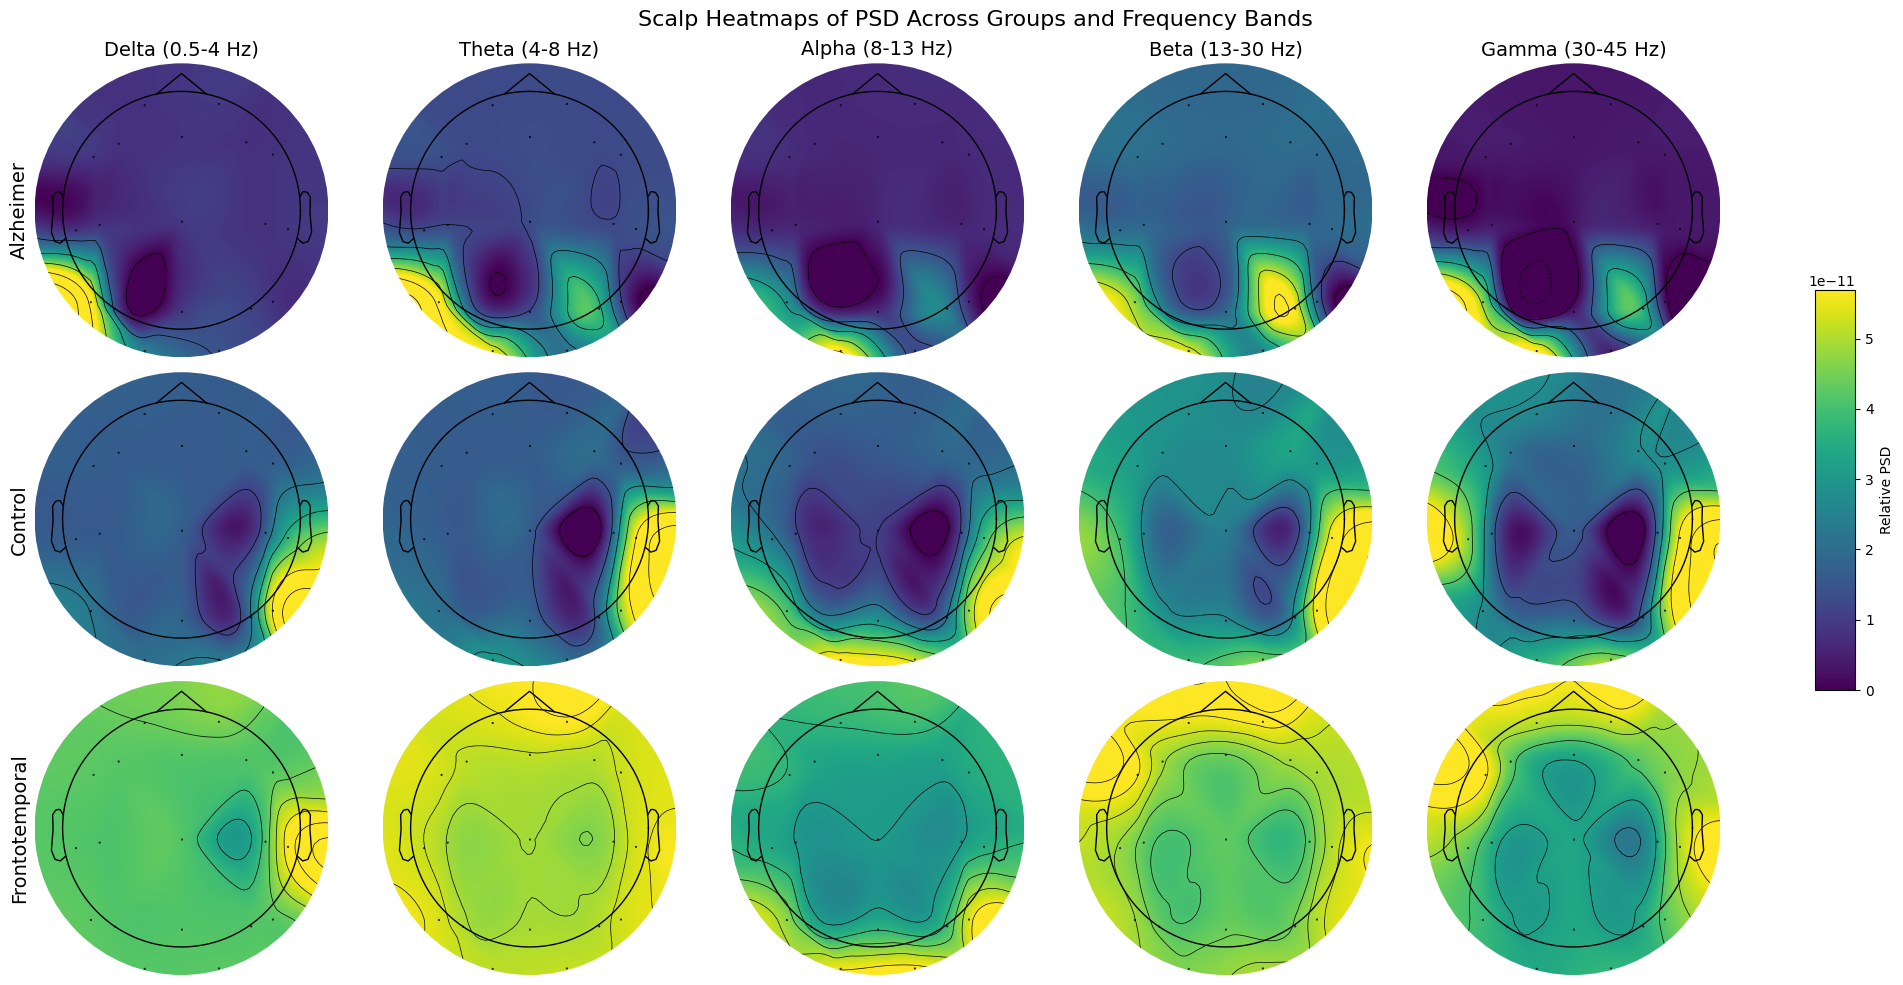

In [49]:
import pandas as pd

# Columns corresponding to frequency bands
frequency_bands = ["Delta (0.5-4 Hz)", "Theta (4-8 Hz)", "Alpha (8-13 Hz)", "Beta (13-30 Hz)", "Gamma (30-45 Hz)"]
# Load data
alz_data = pd.read_csv("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a_all_bp.csv")
ctrl_data = pd.read_csv("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c_all_bp.csv")
ftd_data = pd.read_csv("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f_all_bp.csv")


# Rename "Unnamed: 0" to "Channel" for consistency
for df in [alz_data, ctrl_data, ftd_data]:
    df.rename(columns={"Unnamed: 0": "Channel"}, inplace=True)

# Add group labels
alz_data["Group"] = "Alzheimer"
ctrl_data["Group"] = "Control"
ftd_data["Group"] = "Frontotemporal"

# Combine all data into one DataFrame
all_data = pd.concat([alz_data, ctrl_data, ftd_data], ignore_index=True)
# Plot the topomaps
plot_grouped_topomaps(
    data=all_data,
    group_col="Group",
    channel_col="Channel",
    value_cols=frequency_bands
)

Now, we want to run a random forest classifier to see if the diffrence can be predicted. to do that, we must compute the average power for each band, and save it into a matrix in  a csv format. 

In [55]:

from pathlib import Path

# Base directory for your dataset
base_dir = Path("/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data")

# Groups and prefixes
groups = {
    "frontotemporal": "f",
    "control": "c",
    "alzhimer": "a",
}

# Loop through each group and process the files
for group, prefix in groups.items():
    # Paths for clean data and band power directories
    clean_data_dir = base_dir / group / "clean"
    band_power_dir = base_dir / group / "band_power"

    # Ensure the band power directory exists
    band_power_dir.mkdir(parents=True, exist_ok=True)

    # Process each file in the clean data directory
    for i in range(1, 6):  # Assuming files are numbered 1 to 5
        file_name = f"{prefix}{i:03d}_cleaned.set"
        input_path = clean_data_dir / file_name
        output_path = band_power_dir / f"{prefix}{i:03d}_bp.csv"


Now, we combine the data of al

Now, we can use the csv files to train a random forest model. 

In [57]:
# Load the files
files_frontotemporal = [
    f"/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/frontotemporal/band_power/f{i:03d}_bp.csv"
    for i in range(1, 6)
]
files_control = [
    f"/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/control/band_power/c{i:03d}_bp.csv"
    for i in range(1, 6)
]
files_alzhimer = [
    f"/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/alzhimer/band_power/a{i:03d}_bp.csv"
    for i in range(1, 6)
]
# Train the model
model, x = train_model(files_frontotemporal, files_control, files_alzhimer)


Confusion Matrix:
 [[28  0  0]
 [ 2 23  1]
 [ 1  1 30]]

Classification Report:
                          precision    recall  f1-score   support

              Alzheimer       0.90      1.00      0.95        28
                Control       0.96      0.88      0.92        26
Frontotemporal Dementia       0.97      0.94      0.95        32

               accuracy                           0.94        86
              macro avg       0.94      0.94      0.94        86
           weighted avg       0.94      0.94      0.94        86



now we will test the model by feeding new unlabeled data to it

Fronto-temporal: 

In [52]:
new_data = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/model_test/band_power/f006_bp.csv"
classify_new_data(model, x , new_data)

The model predicted Frontotemporal Dementia
    Delta (0.5-4 Hz)  Theta (4-8 Hz)  Alpha (8-13 Hz)  Beta (13-30 Hz)  \
0       2.372289e-09    1.535647e-10     9.283000e-11     6.347515e-11   
1       2.373374e-09    1.511275e-10     9.316269e-11     7.090142e-11   
2       2.240850e-09    1.427606e-10     7.865297e-11     4.551502e-11   
3       2.271771e-09    1.419546e-10     7.589926e-11     4.718792e-11   
4       2.217825e-09    1.388882e-10     5.501572e-11     4.143467e-11   
5       2.231620e-09    1.377381e-10     5.259294e-11     4.125662e-11   
6       2.232662e-09    1.463796e-10     1.815664e-10     5.967729e-11   
7       2.235258e-09    1.460923e-10     1.984929e-10     5.651700e-11   
8       2.279656e-09    1.708476e-10     5.186937e-10     1.139235e-10   
9       2.275296e-09    1.818950e-10     6.337961e-10     1.233045e-10   
10      2.238537e-09    1.356720e-10     4.257339e-11     3.005478e-11   
11      2.324586e-09    1.494576e-10     7.903098e-11     5.532274e-

,Delta (0.5-4 Hz),Theta (4-8 Hz),Alpha (8-13 Hz),Beta (13-30 Hz),Gamma (30-45 Hz),Predicted_Label
0,2.372289e-09,1.535647e-10,9.283000e-11,6.347515e-11,2.241722e-11,Control
1,2.373374e-09,1.511275e-10,9.316269e-11,7.090142e-11,2.820986e-11,Control
2,2.240850e-09,1.427606e-10,7.865297e-11,4.551502e-11,1.094749e-11,Control
3,2.271771e-09,1.419546e-10,7.589926e-11,4.718792e-11,1.169629e-11,Frontotemporal Dementia
4,2.217825e-09,1.388882e-10,5.501572e-11,4.143467e-11,8.901750e-12,Frontotemporal Dementia
5,2.231620e-09,1.377381e-10,5.259294e-11,4.125662e-11,8.729462e-12,Frontotemporal Dementia
6,2.232662e-09,1.463796e-10,1.815664e-10,5.967729e-11,1.210435e-11,Alzheimer
7,2.235258e-09,1.460923e-10,1.984929e-10,5.651700e-11,9.913915e-12,Alzheimer
8,2.279656e-09,1.708476e-10,5.186937e-10,1.139235e-10,2.511881e-11,Frontotemporal Dementia
9,2.275296e-09,1.818950e-10,6.337961e-10,1.233045e-10,1.956492e-11,Frontotemporal Dementia


In [53]:
new_data = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/model_test/band_power/c006_bp.csv"
classify_new_data(model, x , new_data)

The model predicted Control
    Delta (0.5-4 Hz)  Theta (4-8 Hz)  Alpha (8-13 Hz)  Beta (13-30 Hz)  \
0       1.085960e-08    2.521042e-10     1.085320e-10     3.715631e-10   
1       5.574811e-09    2.084547e-10     9.619502e-11     3.176542e-10   
2       6.447626e-09    2.375694e-10     1.002616e-10     2.559381e-10   
3       1.599274e-08    1.818566e-10     7.557037e-11     1.807707e-10   
4       2.502757e-09    1.531979e-10     6.502857e-11     1.659567e-10   
5       2.531112e-09    1.532484e-10     6.585353e-11     1.601874e-10   
6       2.885844e-09    1.699221e-10     1.014905e-10     1.269021e-10   
7       2.987723e-09    1.761315e-10     1.177183e-10     1.533434e-10   
8       1.323460e-08    2.743006e-10     2.831428e-10     2.074179e-10   
9       1.343783e-08    3.094103e-10     2.733352e-10     2.251827e-10   
10      5.754345e-09    2.347397e-10     1.767273e-10     1.221311e-09   
11      1.007543e-08    2.567179e-10     1.843325e-10     1.042900e-09   
12      3.

,Delta (0.5-4 Hz),Theta (4-8 Hz),Alpha (8-13 Hz),Beta (13-30 Hz),Gamma (30-45 Hz),Predicted_Label
0,1.085960e-08,2.521042e-10,1.085320e-10,3.715631e-10,3.433292e-10,Frontotemporal Dementia
1,5.574811e-09,2.084547e-10,9.619502e-11,3.176542e-10,2.819775e-10,Frontotemporal Dementia
2,6.447626e-09,2.375694e-10,1.002616e-10,2.559381e-10,2.312383e-10,Control
3,1.599274e-08,1.818566e-10,7.557037e-11,1.807707e-10,1.749634e-10,Control
4,2.502757e-09,1.531979e-10,6.502857e-11,1.659567e-10,1.536820e-10,Control
5,2.531112e-09,1.532484e-10,6.585353e-11,1.601874e-10,1.445729e-10,Control
6,2.885844e-09,1.699221e-10,1.014905e-10,1.269021e-10,7.999898e-11,Control
7,2.987723e-09,1.761315e-10,1.177183e-10,1.533434e-10,1.178577e-10,Control
8,1.323460e-08,2.743006e-10,2.831428e-10,2.074179e-10,1.351943e-10,Control
9,1.343783e-08,3.094103e-10,2.733352e-10,2.251827e-10,1.572604e-10,Control


and alzhimer: 

In [54]:
new_data = "/Users/noam/Documents/myProjects/Resting-state-EEG-project/src/data/model_test/band_power/a006_bp.csv"
classify_new_data(model, x , new_data)

The model predicted Alzheimer
    Delta (0.5-4 Hz)  Theta (4-8 Hz)  Alpha (8-13 Hz)  Beta (13-30 Hz)  \
0       1.637776e-08    2.124745e-09     6.802880e-10     7.777054e-10   
1       1.862370e-08    2.171827e-09     7.350672e-10     7.781504e-10   
2       1.628634e-08    2.112729e-09     6.670556e-10     8.184218e-10   
3       1.596411e-08    2.098977e-09     6.624047e-10     8.202220e-10   
4       1.629407e-08    2.010383e-09     5.989598e-10     7.624730e-10   
5       1.624408e-08    2.084208e-09     6.046968e-10     7.283962e-10   
6       2.450501e-08    4.032416e-09     9.658931e-10     1.056647e-09   
7       2.237711e-08    6.289074e-09     2.550039e-09     2.290110e-09   
8       4.659692e-08    8.787602e-09     5.895017e-09     2.107840e-09   
9       2.861851e-08    3.602713e-09     1.279343e-09     1.125397e-09   
10      1.720199e-08    2.235803e-09     7.546171e-10     8.264512e-10   
11      1.651940e-08    2.130708e-09     6.924167e-10     7.913365e-10   
12      

,Delta (0.5-4 Hz),Theta (4-8 Hz),Alpha (8-13 Hz),Beta (13-30 Hz),Gamma (30-45 Hz),Predicted_Label
0,1.637776e-08,2.124745e-09,6.802880e-10,7.777054e-10,1.895218e-10,Alzheimer
1,1.862370e-08,2.171827e-09,7.350672e-10,7.781504e-10,1.867009e-10,Alzheimer
2,1.628634e-08,2.112729e-09,6.670556e-10,8.184218e-10,2.193584e-10,Alzheimer
3,1.596411e-08,2.098977e-09,6.624047e-10,8.202220e-10,2.120271e-10,Alzheimer
4,1.629407e-08,2.010383e-09,5.989598e-10,7.624730e-10,2.067204e-10,Alzheimer
5,1.624408e-08,2.084208e-09,6.046968e-10,7.283962e-10,2.043415e-10,Alzheimer
6,2.450501e-08,4.032416e-09,9.658931e-10,1.056647e-09,2.421172e-10,Alzheimer
7,2.237711e-08,6.289074e-09,2.550039e-09,2.290110e-09,1.901073e-09,Alzheimer
8,4.659692e-08,8.787602e-09,5.895017e-09,2.107840e-09,2.929817e-09,Alzheimer
9,2.861851e-08,3.602713e-09,1.279343e-09,1.125397e-09,3.257261e-10,Alzheimer
